# `20190404a` dual smas

In [24]:
from pyUn0 import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

### Exploring FFT and different spectral components

Data acquired


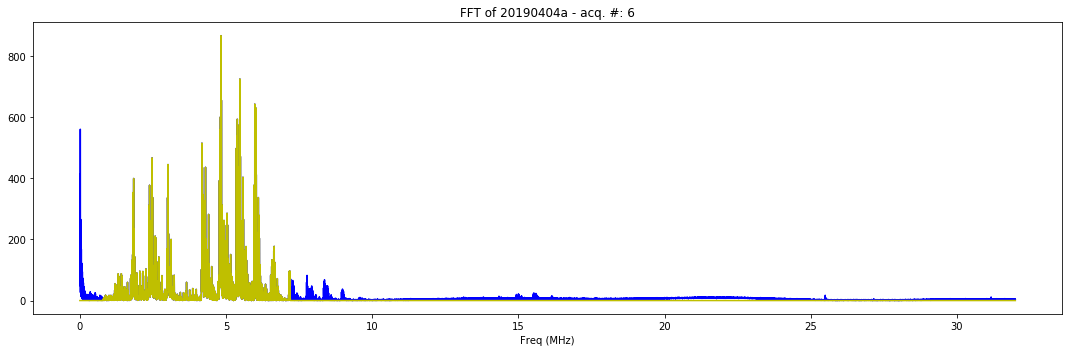

Data acquired


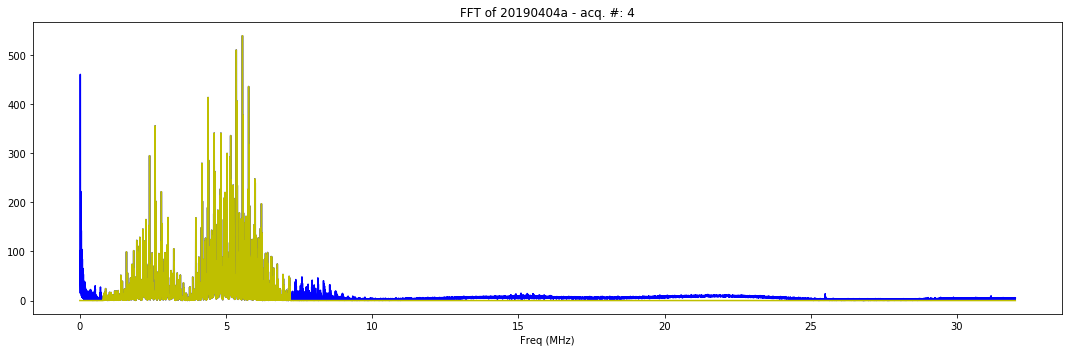

Data acquired


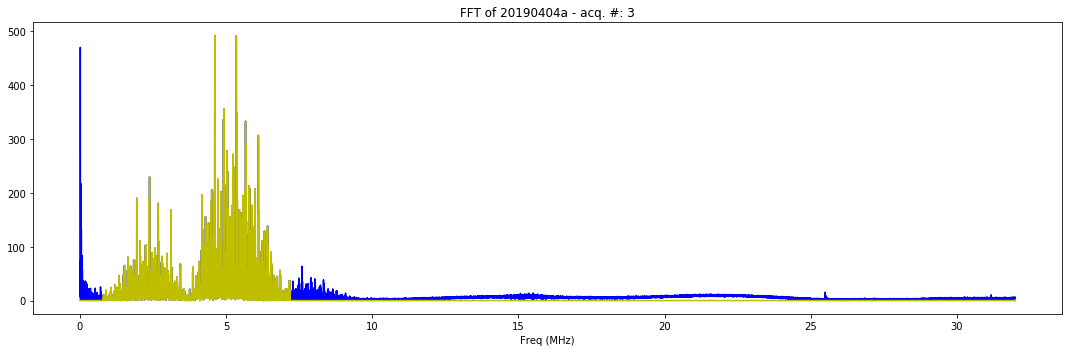

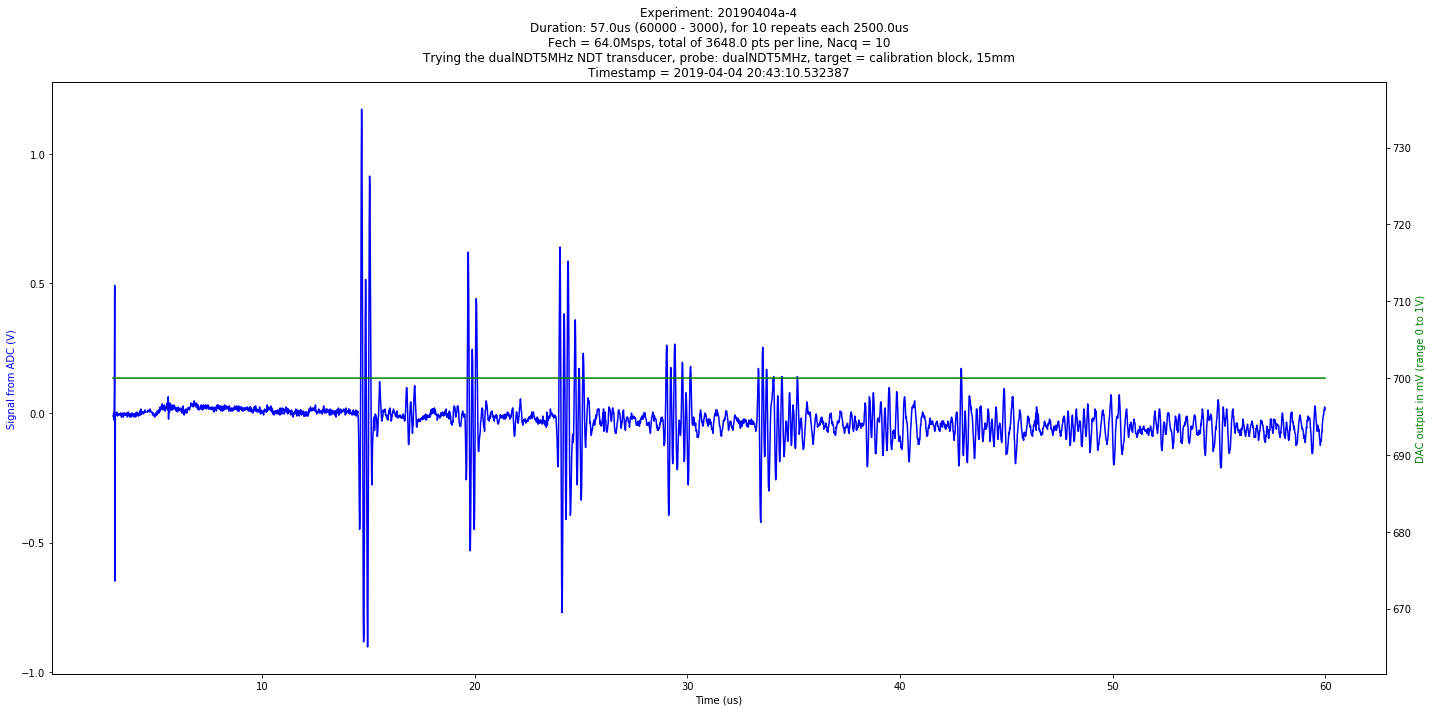

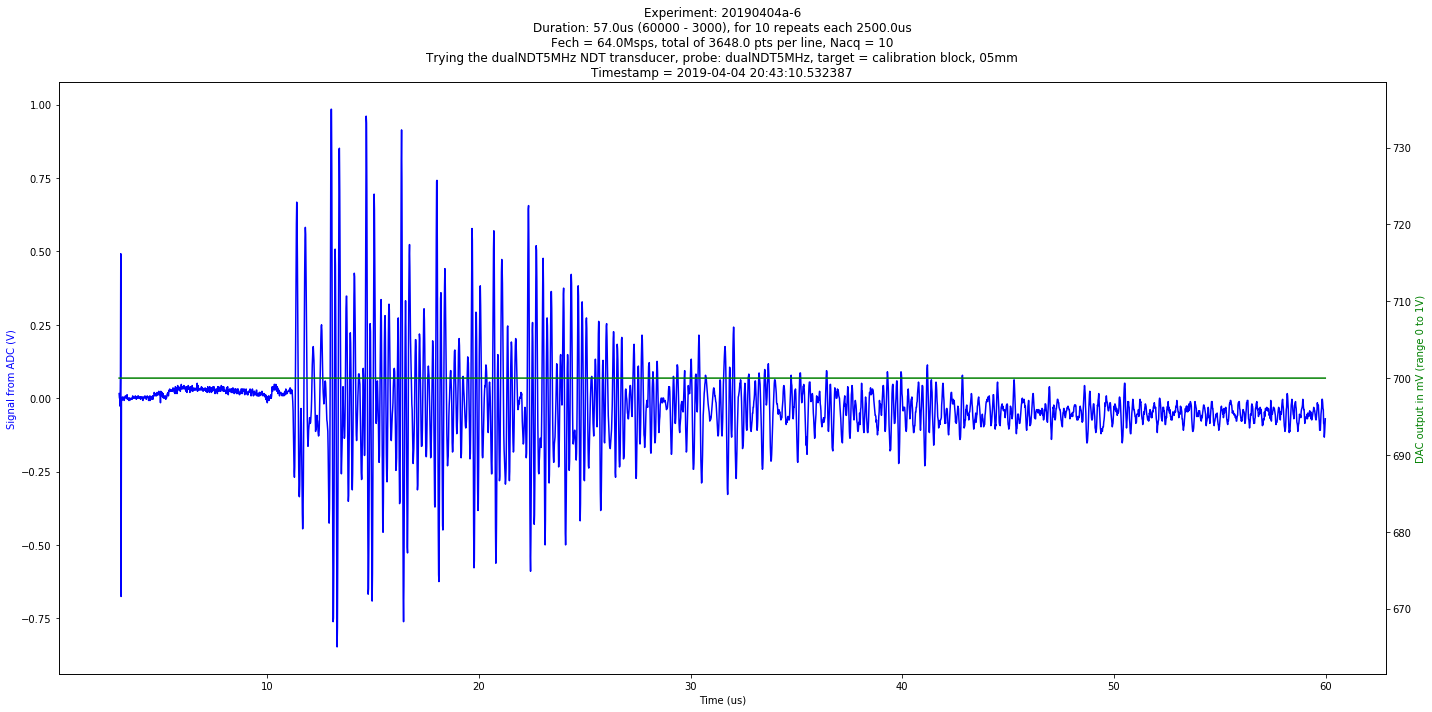

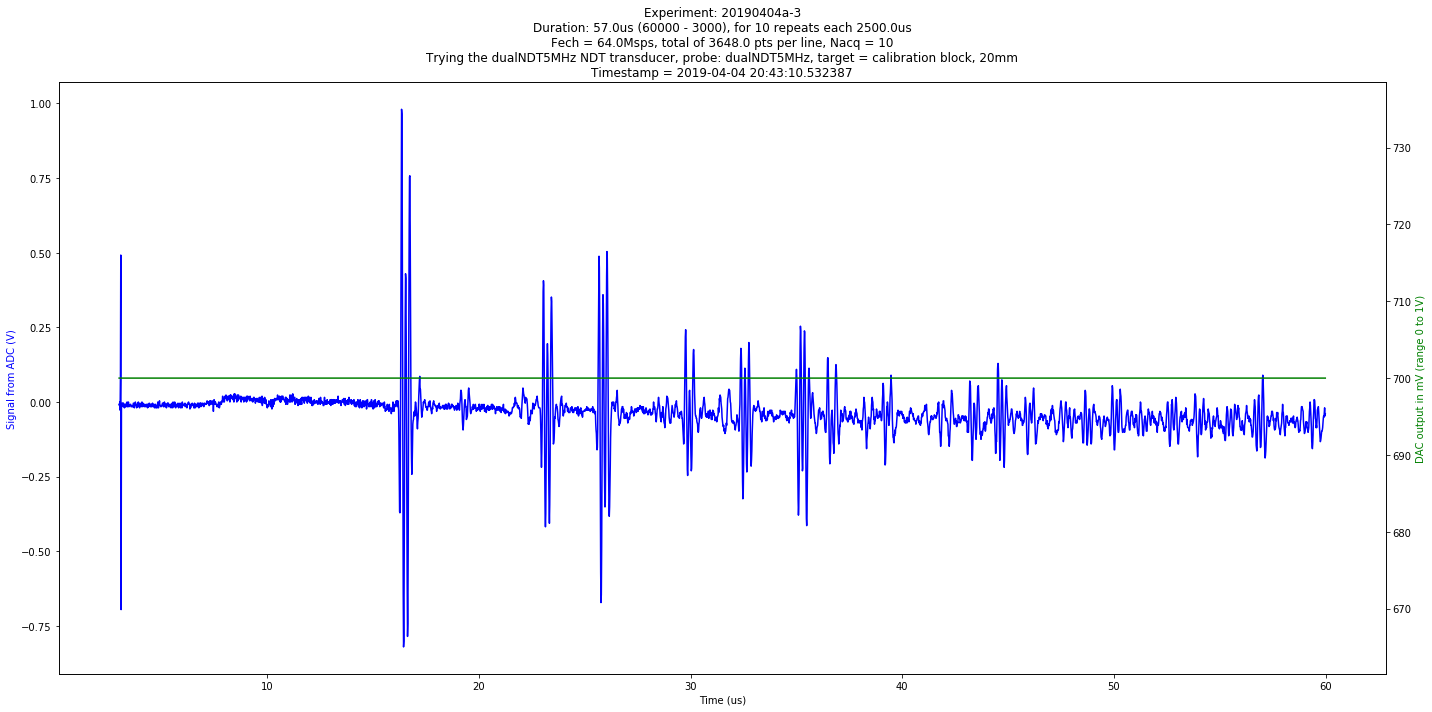

In [31]:
y = us_json()
y.fPiezo = 4
y.Bandwidth = 1.6
y.JSONprocessing("./data/20190404a-6.json")
y.create_fft() 

x = us_json()
x.fPiezo = 4
x.Bandwidth = 1.6
x.JSONprocessing("./data/20190404a-4.json")
x.create_fft() 

z = us_json()
z.fPiezo = 4
z.Bandwidth = 1.6
z.JSONprocessing("./data/20190404a-3.json")
z.create_fft() 

x.mkImg()
y.mkImg()
z.mkImg()

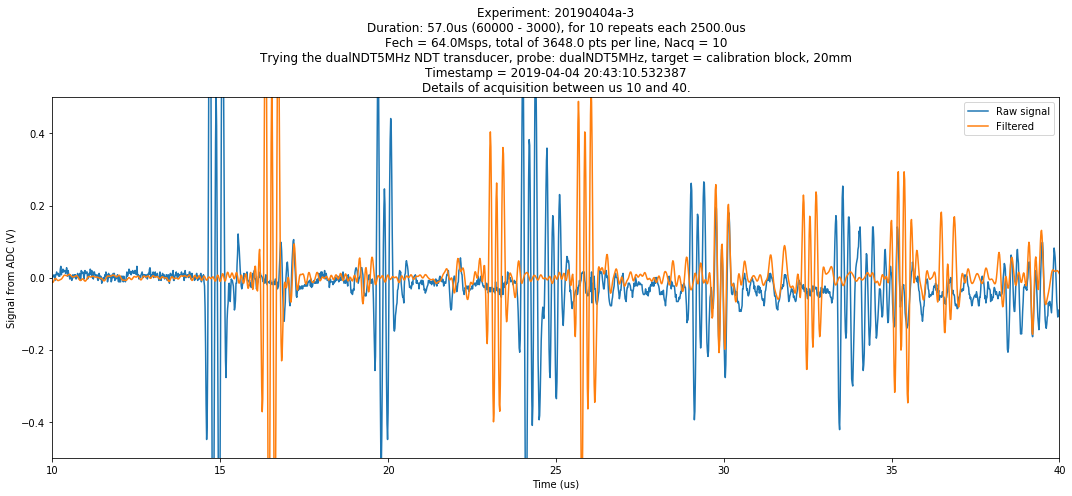

In [32]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=10, 40
ax.plot(x.t,x.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.5, 0.5)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "graph", DESC)

plt.show()

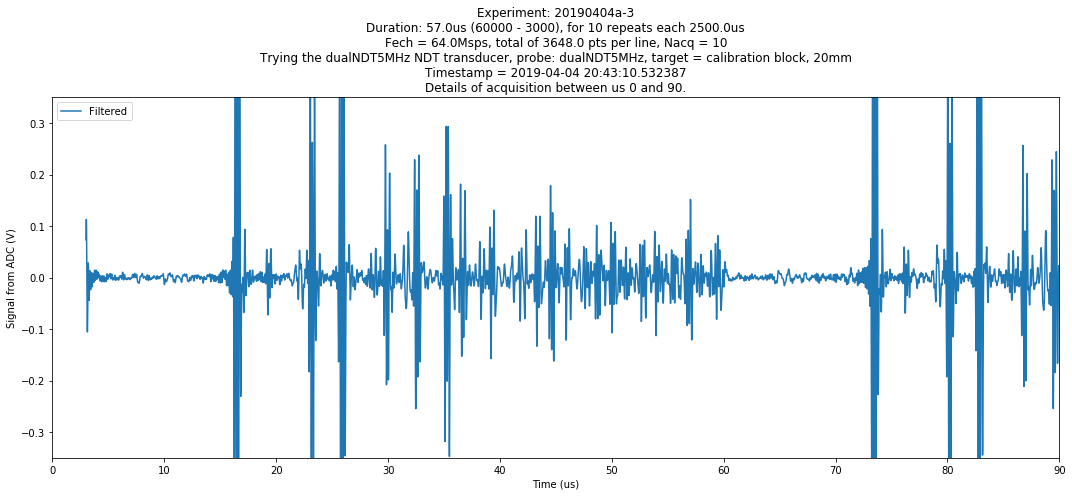

In [33]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=0, 90
#ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)    
tag_image(file_name,"matty,dualNDT5MHz", x.experiment["id"], "signal", DESC)

plt.show()

## Using all lines

3648 10


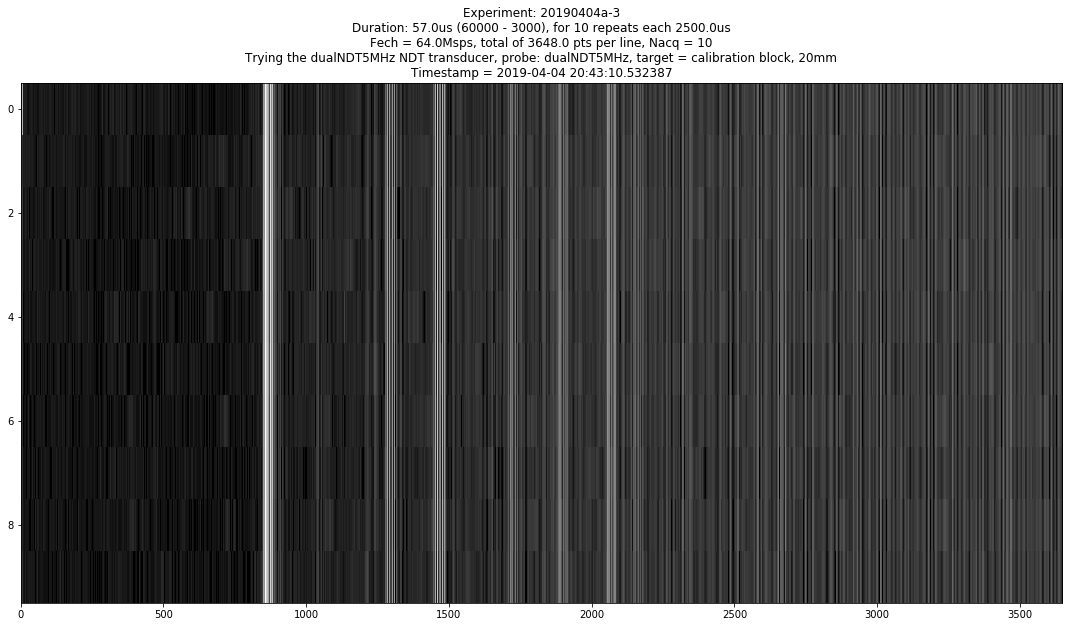

In [34]:
clean_image = z.mk2DArray()

((10, 3648), (3648,))


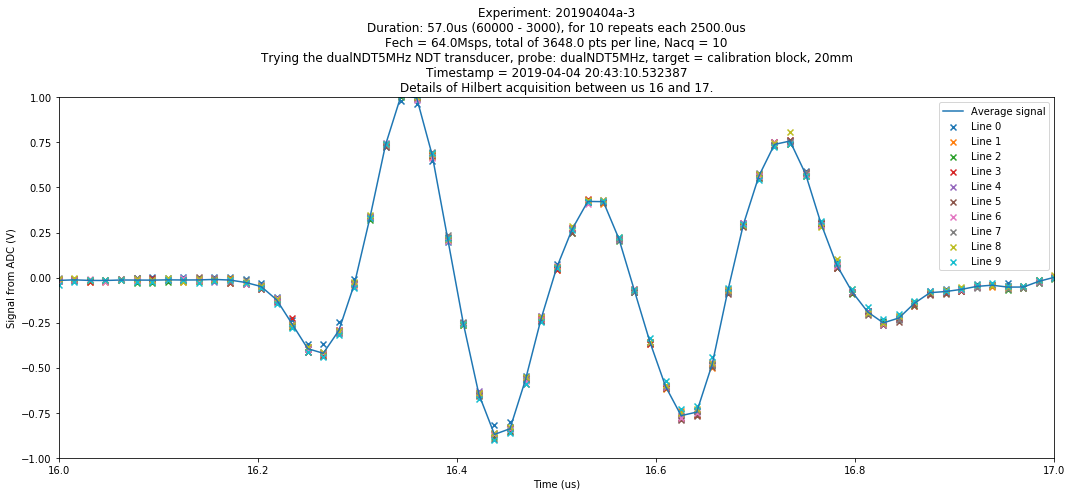

In [35]:
print(clean_image.shape,clean_image.sum(0).shape)
avg_signal = clean_image.sum(0)/10.0
lenmax = len(clean_image[k])
T = z.t[0:lenmax]



fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=16,17
for k in range(len(clean_image)):
    ax.scatter(T,clean_image[k],label = "Line "+str(k),marker="x")
ax.plot(T,avg_signal,label = "Average signal")

ax.set_xlim(minT,maxT)
ax.set_ylim(-1,1)

ax.legend()

DESC = z.create_title_text()+"\nDetails of Hilbert acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_alllines_avg_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", z.experiment["id"], "hilbert,signal", DESC)

plt.show()